In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

In [3]:
os.chdir("E:\Data Science\R\PROJECTS\PROJECT 2\Dataset\Python")

In [4]:
churndata=pd.read_csv("churn.csv")

In [5]:
churndata.shape

(12335, 21)

In [6]:
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [7]:
with pd.option_context("display.max_rows",None,"display.max_column",None):
    print(churndata.dtypes)

customerID                  object
gender                      object
SeniorCitizen              float64
Partner                     object
Dependents                  object
tenure                     float64
CallService                 object
MultipleConnections         object
InternetConnection          object
OnlineSecurity              object
OnlineBackup                object
DeviceProtectionService     object
TechnicalHelp               object
OnlineTV                    object
OnlineMovies                object
Agreement                   object
BillingMethod               object
PaymentMethod               object
MonthlyServiceCharges      float64
TotalAmount                float64
Churn                       object
dtype: object


In [8]:
churndata.dtypes.value_counts()

object     17
float64     4
dtype: int64

In [9]:
churndata.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

In [10]:
churndata['Churn'].value_counts()

No     6728
Yes    5607
Name: Churn, dtype: int64

In [11]:
churndata.drop(['customerID'],axis=1, inplace=True)

In [12]:
churndata['Churn']=(churndata['Churn']=='Yes').astype(int)

In [13]:
churndata.shape

(12335, 20)

In [14]:
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,0
1,Female,0.0,No,No,67.0,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,0
2,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,0
3,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,0
4,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,0


In [15]:
churndata['Churn'].value_counts()

0    6728
1    5607
Name: Churn, dtype: int64

In [16]:
churndata['gender'].value_counts()

Female    6216
Male      6119
Name: gender, dtype: int64

In [17]:
churndata.gender[churndata.gender == 'Male'] = 1
churndata.gender[churndata.gender == 'Female'] = 2
print(churndata.head())

  gender  SeniorCitizen Partner Dependents  tenure CallService  \
0      2            0.0     Yes        Yes    11.0         Yes   
1      2            0.0      No         No    67.0          No   
2      2            0.0     Yes         No    59.0         Yes   
3      1            0.0     Yes        Yes    67.0         Yes   
4      2            0.0      No         No    11.0         Yes   

  MultipleConnections InternetConnection       OnlineSecurity  \
0                  No                 No  No internet service   
1    No phone service                DSL                   No   
2                  No                 No  No internet service   
3                 Yes                 No  No internet service   
4                 Yes        Fiber optic                   No   

          OnlineBackup DeviceProtectionService        TechnicalHelp  \
0  No internet service     No internet service  No internet service   
1                   No                     Yes                  Yes   

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
churndata['Partner']=(churndata['Partner']=='Yes').astype(int)

In [19]:
churndata['Dependents'].value_counts()

No     7974
Yes    4361
Name: Dependents, dtype: int64

In [20]:
churndata['Dependents']=(churndata['Dependents']=='Yes').astype(int)

In [21]:
churndata['CallService'].value_counts()

Yes    10933
No      1402
Name: CallService, dtype: int64

In [22]:
churndata['CallService']=(churndata['CallService']=='Yes').astype(int)

In [23]:
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2,0.0,1,1,11.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,0
1,2,0.0,0,0,67.0,0,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,0
2,2,0.0,1,0,59.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,0
3,1,0.0,1,1,67.0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,0
4,2,0.0,0,0,11.0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,0


In [24]:
churndata['gender']=pd.to_numeric(churndata['gender'])

In [25]:
churndata['BillingMethod'].value_counts()

Yes    7053
No     5282
Name: BillingMethod, dtype: int64

In [26]:
churndata['BillingMethod'] = (churndata['BillingMethod']=='Yes').astype(int)

In [27]:
churn_cat=[feature for feature in churndata.columns if churndata[feature].dtypes=='O']
churn_cat

['MultipleConnections',
 'InternetConnection',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtectionService',
 'TechnicalHelp',
 'OnlineTV',
 'OnlineMovies',
 'Agreement',
 'PaymentMethod']

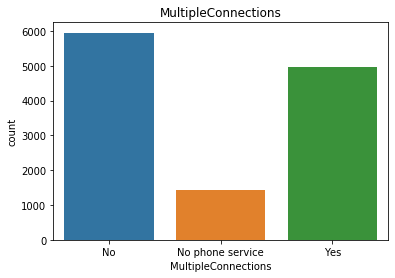

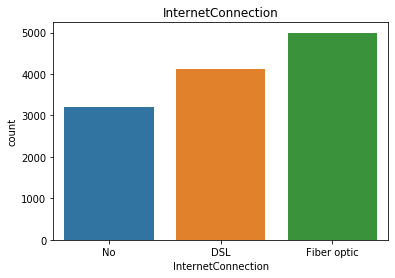

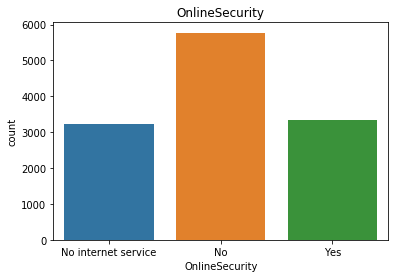

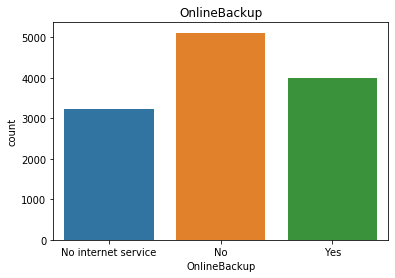

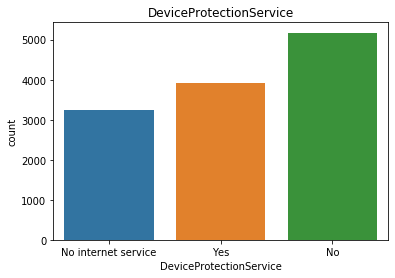

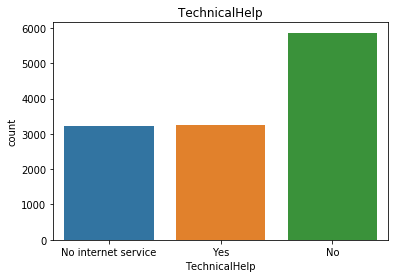

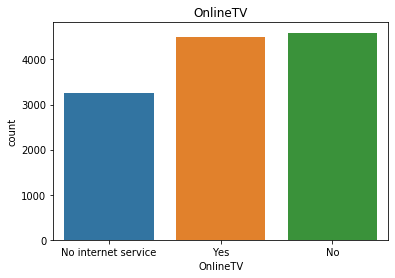

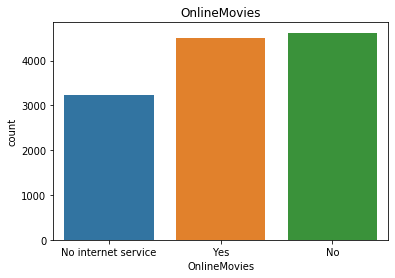

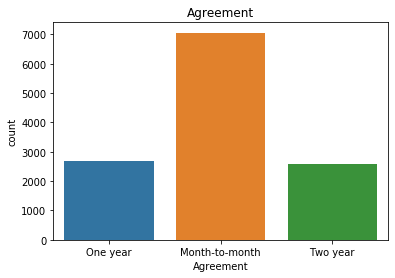

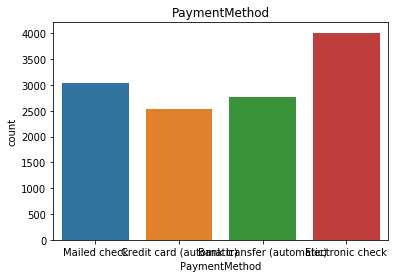

In [28]:
for feature in churn_cat:
    data=churndata.copy()
    sns.countplot(x=data[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()
    

In [29]:
for col in churn_cat:
    dummy=pd.get_dummies(churndata[col],drop_first=True,prefix=col)
    churndata=pd.concat([churndata,dummy],axis=1)
    del churndata[col]
    print(col)
del dummy

MultipleConnections
InternetConnection
OnlineSecurity
OnlineBackup
DeviceProtectionService
TechnicalHelp
OnlineTV
OnlineMovies
Agreement
PaymentMethod


In [30]:
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,BillingMethod,MonthlyServiceCharges,TotalAmount,Churn,...,TechnicalHelp_Yes,OnlineTV_No internet service,OnlineTV_Yes,OnlineMovies_No internet service,OnlineMovies_Yes,Agreement_One year,Agreement_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,0.0,1,1,11.0,1,0,20.60,233.90,0,...,0,1,0,1,0,1,0,0,0,1
1,2,0.0,0,0,67.0,0,1,53.40,3579.15,0,...,1,0,1,0,1,0,0,1,0,0
2,2,0.0,1,0,59.0,1,0,18.40,1057.85,0,...,0,1,0,1,0,0,1,0,0,0
3,1,0.0,1,1,67.0,1,0,26.30,1688.90,0,...,0,1,0,1,0,0,1,0,0,1
4,2,0.0,0,0,11.0,1,0,75.25,888.65,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
churndata.dtypes

gender                                           int64
SeniorCitizen                                  float64
Partner                                          int32
Dependents                                       int32
tenure                                         float64
CallService                                      int32
BillingMethod                                    int32
MonthlyServiceCharges                          float64
TotalAmount                                    float64
Churn                                            int32
MultipleConnections_No phone service             uint8
MultipleConnections_Yes                          uint8
InternetConnection_Fiber optic                   uint8
InternetConnection_No                            uint8
OnlineSecurity_No internet service               uint8
OnlineSecurity_Yes                               uint8
OnlineBackup_No internet service                 uint8
OnlineBackup_Yes                                 uint8
DeviceProt

In [32]:
# make another copy of model after removing those variables having no internet , no phone type services
churndata_No = churndata.copy()

In [33]:
churndata_No.dtypes

gender                                           int64
SeniorCitizen                                  float64
Partner                                          int32
Dependents                                       int32
tenure                                         float64
CallService                                      int32
BillingMethod                                    int32
MonthlyServiceCharges                          float64
TotalAmount                                    float64
Churn                                            int32
MultipleConnections_No phone service             uint8
MultipleConnections_Yes                          uint8
InternetConnection_Fiber optic                   uint8
InternetConnection_No                            uint8
OnlineSecurity_No internet service               uint8
OnlineSecurity_Yes                               uint8
OnlineBackup_No internet service                 uint8
OnlineBackup_Yes                                 uint8
DeviceProt

# Now we will check the coorelation between variables on dataset (churndata)

In [35]:
corelation_plot=churndata.corr().round(2)

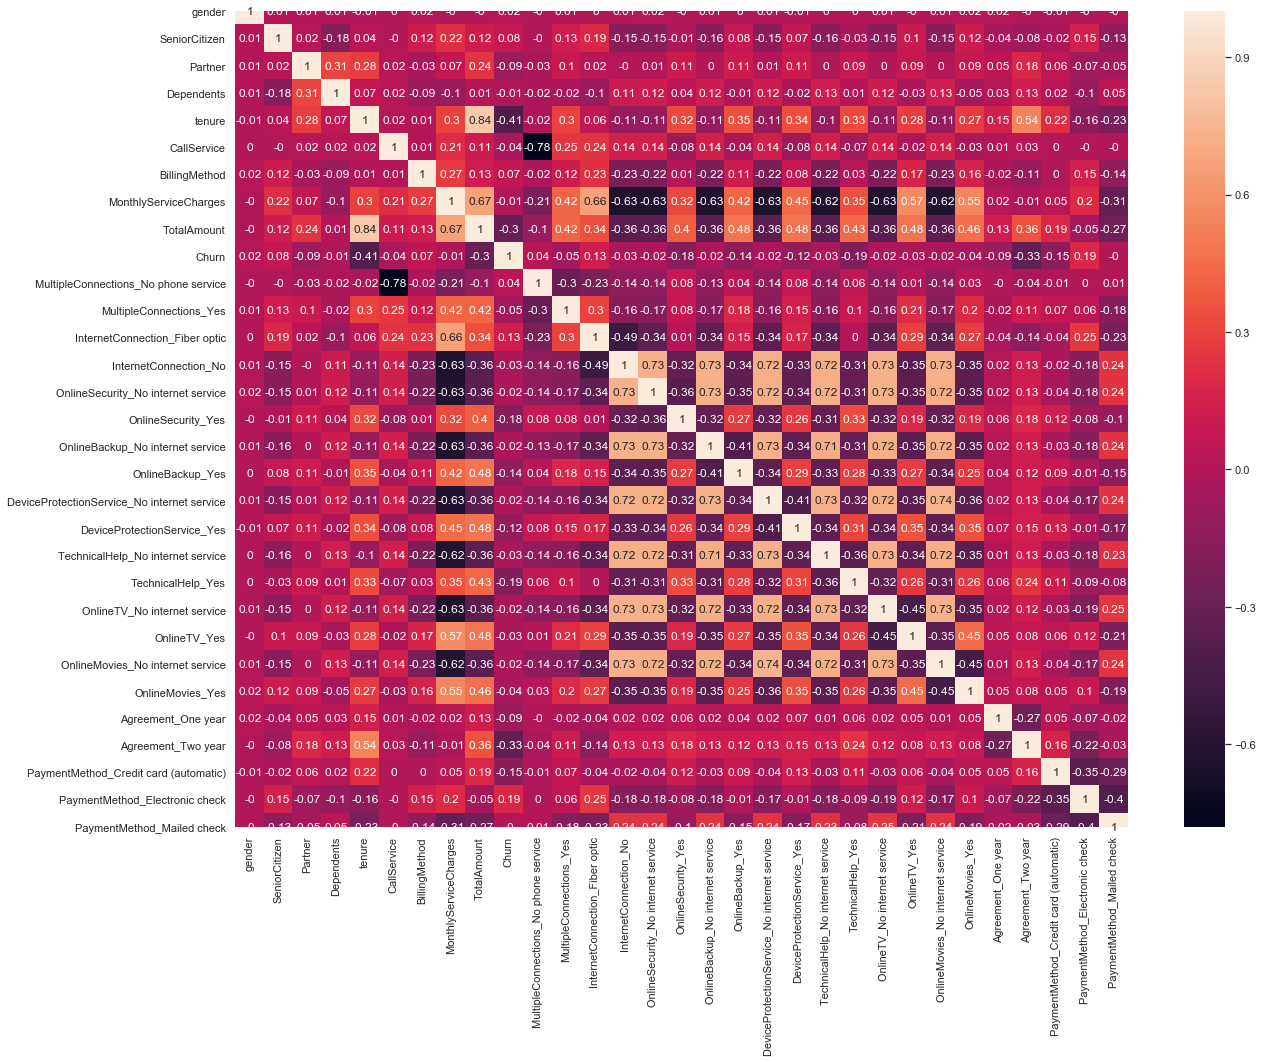

In [36]:
sns.set(rc={"figure.figsize":(20,15)})
sns.heatmap(data=corelation_plot, annot=True)

# As per heatmap results now scaling & PCA will apply on dataset 2 (churndata_No) 

In [38]:
x = churndata.drop(["Churn"], axis=1)
y = churndata["Churn"]

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X = scaler.fit_transform(x)

In [42]:
from sklearn.decomposition import PCA

In [43]:
x.shape

(12335, 30)

In [44]:
pca = PCA(n_components=30)

In [45]:
X1 = pca.fit_transform(X)

In [46]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var

array([27.65, 37.86, 45.74, 50.25, 54.34, 58.36, 62.05, 65.4 , 68.6 ,
       71.73, 74.55, 77.05, 79.4 , 81.62, 83.8 , 85.91, 87.94, 89.85,
       91.57, 92.63, 93.6 , 94.52, 95.42, 96.29, 97.14, 97.93, 98.68,
       99.39, 99.79, 99.98])

In [47]:
X1 = pd.DataFrame(X1)

In [48]:
X1.shape

(12335, 30)

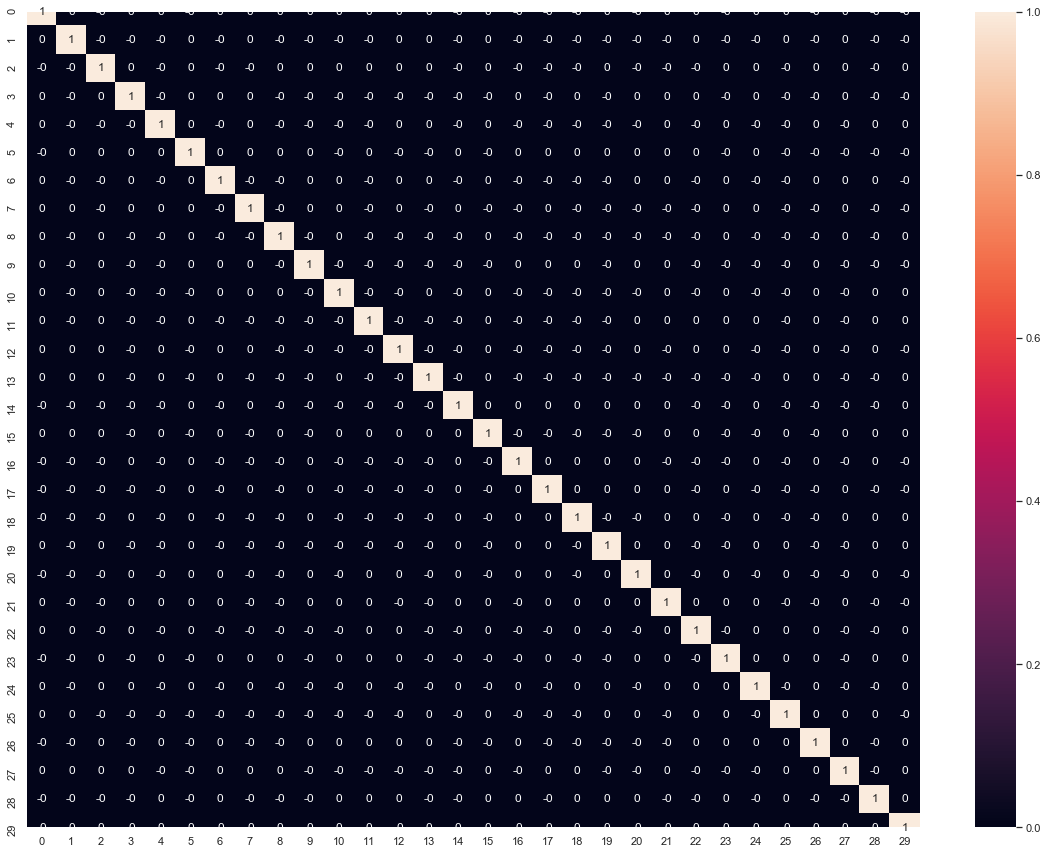

In [49]:
sns.set(rc={"figure.figsize":(20,15)})
correlation_matrix1=X1.corr().round(2)
sns.heatmap(data=correlation_matrix1,annot=True)

In [50]:
from sklearn.model_selection import train_test_split 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=0)

In [53]:
# create classifier
clf1 = LogisticRegression(); 
clf2 = DecisionTreeClassifier(); 
clf3 = RandomForestClassifier();

In [54]:
# fit model
clf1.fit(x_train,y_train);
clf2.fit(x_train,y_train);
clf3.fit(x_train,y_train);

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
# run prediction on model  
y_pred_lr = clf1.predict(x_test);
y_pred_dt = clf2.predict(x_test);
y_pred_rf = clf3.predict(x_test);

In [56]:
# create confusion matrix
LR = confusion_matrix(y_test,y_pred_lr);
print("logistic regression:",LR)
DT = confusion_matrix(y_test,y_pred_dt);
print("decision tree:", DT)
RF = confusion_matrix(y_test,y_pred_rf);
print("random forest:", RF)

logistic regression: [[1400  601]
 [ 501 1199]]
decision tree: [[1796  205]
 [ 311 1389]]
random forest: [[1867  134]
 [ 364 1336]]


In [57]:
accuracy_lr = (1400+1199)/(501+601+1400+1199)*100
accuracy_lr

70.22426371251014

In [58]:
accuracy_dt = (1809+1406)/(192+294+1809+1406)*100
accuracy_dt

86.8684139421778

In [59]:
accuracy_rf = (1894+1355)/(107+345+1894+1355)*100
accuracy_rf

87.78708457173737

In [60]:
# get predicted probablities:
y_score_lr = clf1.predict_proba(x_test)[:, 1];
y_score_dt = clf2.predict_proba(x_test)[:, 1];
y_score_rf = clf3.predict_proba(x_test)[:, 1];

In [61]:
#Plot ROC curve
# Create tpr, frp rates
fpr1,tpr1, threshold1= roc_curve(y_test, y_score_lr);
fpr2,tpr2, threshold2 = roc_curve(y_test, y_score_dt);
fpr3,tpr3, threshold3 = roc_curve(y_test, y_score_rf);

auc_lr = roc_auc_score(y_test,y_score_lr)
print('AUC_lr: %.5f' %auc_lr)
auc_dt = roc_auc_score(y_test, y_score_dt)
print('AUC_dt: %.5f' %auc_dt)
auc_rf = roc_auc_score(y_test, y_score_rf)
print('AUC_rf: %.5f' %auc_rf)

AUC_lr: 0.77518
AUC_dt: 0.85756
AUC_rf: 0.94416


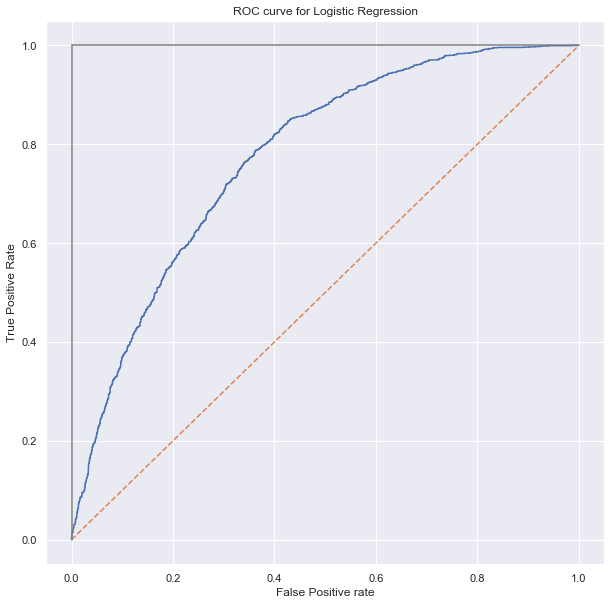

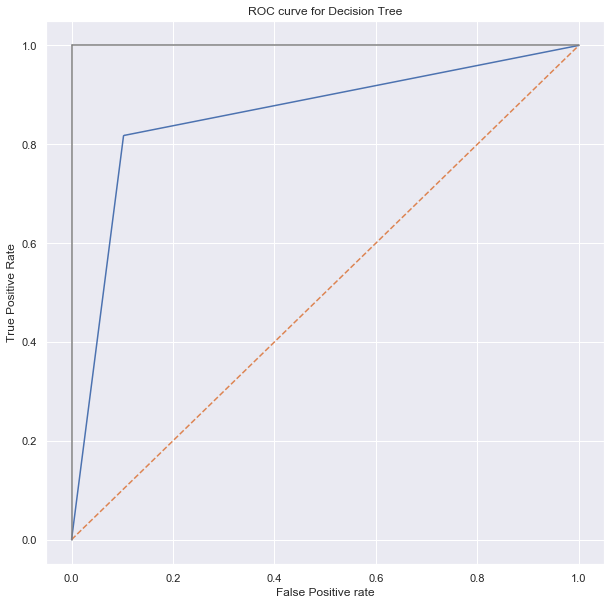

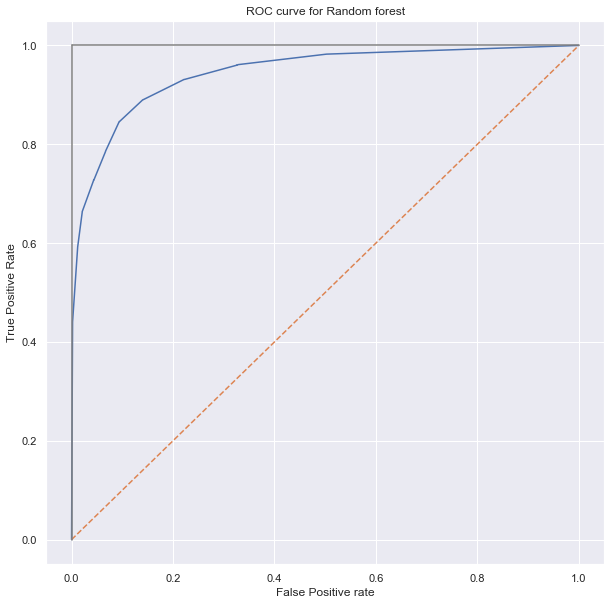

In [62]:
# plot ROC curve
plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Logistic Regression")
plt.plot(fpr1,tpr1)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Decision Tree")
plt.plot(fpr2,tpr2)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Random forest")
plt.plot(fpr3,tpr3)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

# As per auc score and accuracy Decision Tree and random forest model give good result now we can compare applying hyperparameters

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [75]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features":[5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [65]:
# Set parameters for Decision Tree
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [66]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [81]:
random_search_dt = RandomizedSearchCV(model_dt, param_distributions=params, scoring='roc_auc', n_iter=10)

In [82]:
random_search_dt.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [76]:
n_iter_search = 3

random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_dist,n_iter=n_iter_search,scoring='roc_auc',
                                     cv=5)
random_search_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [77]:
y_score_rf = random_search_rf.best_estimator_
y_score_rf

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
y_score_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_score_dt = random_search_dt.best_estimator_
y_score_dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
y_score_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
y_pred_dt = y_score_dt.predict(x_test);
y_pred_rf = y_score_rf.predict(x_test);

In [86]:
# create confusion matrix
DT_hp = confusion_matrix(y_test,y_pred_dt);
print("confusion matrix for DT:", DT_hp)
RF_hp = confusion_matrix(y_test, y_pred_rf);
print("confusion matrix for DT:", RF_hp)

confusion matrix for DT: [[1818  183]
 [ 387 1313]]
confusion matrix for DT: [[1858  143]
 [ 288 1412]]


In [87]:
accuracy_dt_hp = (1818+1313)/(183+387+1818+1313)*100
accuracy_dt_hp

84.59875709267766

In [96]:
error_rate_dt_hp = (183+387)/(183+387+1818+1313)*100
print(error_rate_dt_hp)
sensitivity_dt_hp = (1818)/(1818+183)*100
print(sensitivity_dt_hp)
specificity_dt_hp = (1313)/(387+1313)*100
print(specificity_dt_hp)
precision_dt_hp = (1818)/(1818+387)*100
print(precision_dt_hp)


15.401242907322347
90.85457271364318
77.23529411764706
82.44897959183673


In [97]:
accuracy_rf_hp = (1858+1412)/(143+288+1858+1412)*100
print(accuracy_rf_hp)
error_rate_rf_hp = (143+288)/(1858+143+288+1412)*100
print(error_rate_rf_hp)
sensitivity_rf_hp = (1858)/(1858+143)*100
print(sensitivity_rf_hp)
specificity_rf_hp = (1412)/(288+1412)*100
print(specificity_rf_hp)
precision_rf_hp = (1858)/(1858+288)*100
print(precision_rf_hp)

88.3544987841124
11.645501215887597
92.8535732133933
83.05882352941177
86.57968313140726


In [89]:
# get predicted probablities:
y_pred_dt1 = y_score_dt.predict_proba(x_test)[:, 1];
y_pred_rf1 = y_score_rf.predict_proba(x_test)[:, 1];

In [90]:
# Plot ROC curve
# Create tpr, frp rates
fpr4,tpr4, threshold4 = roc_curve(y_test, y_pred_dt1);
fpr5,tpr5, threshold5 = roc_curve(y_test, y_pred_rf1);

auc_dt_hp = roc_auc_score(y_test,y_pred_dt1)
print('AUC_lr_hp: %.5f' %auc_dt_hp)

auc_rf_hp = roc_auc_score(y_test, y_pred_rf1)
print('AUC_rf_hp: %.5f' %auc_rf_hp)

AUC_lr_hp: 0.91022
AUC_rf_hp: 0.96064


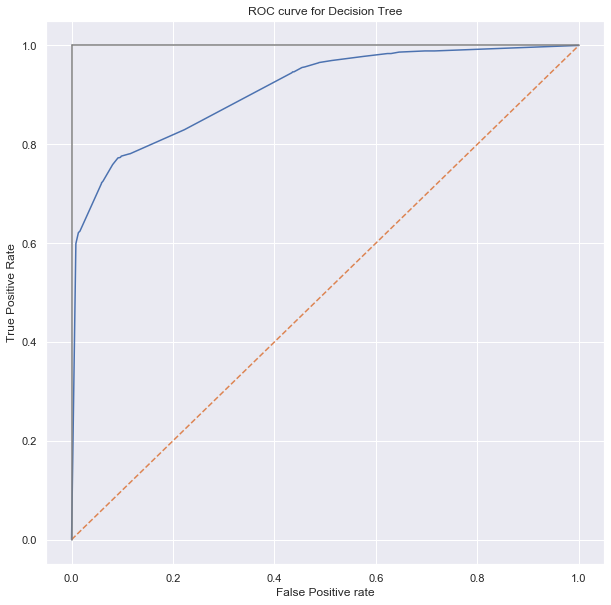

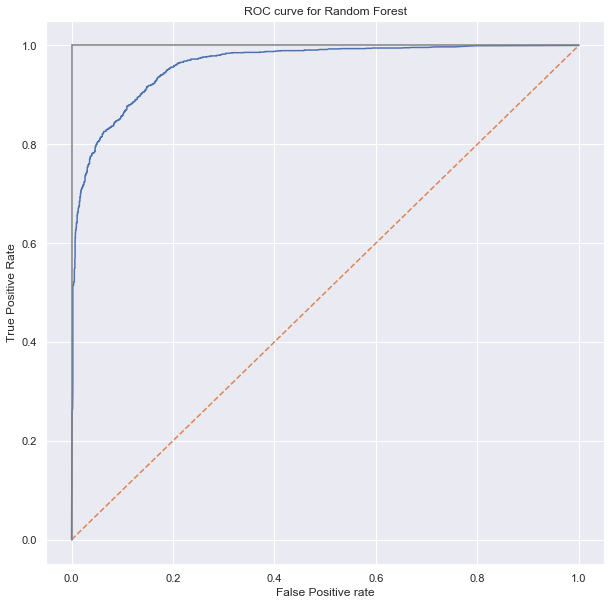

In [91]:
# plot ROC curve
plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Decision Tree")
plt.plot(fpr4,tpr4)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title("ROC curve for Random Forest")
plt.plot(fpr5,tpr5)
plt.plot([0,1], ls = "--")
plt.plot([0,0], [1,0], c= ".5"), plt.plot([1,1], c=".5")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.show()

# As per AUC and accuracy % random forest model gives better result